#Exercise 2

**Part1**

The Travelling Salesman Problem (TSP) is a classic optimization problem in which the goal is to find the shortest possible route that visits a given set of cities (or nodes) exactly once and returns to the original city. The problem can be defined as follows:

Given:
- A set of cities C = {1, 2, ..., n} where n is the total number of cities.
- The distance or cost d_ij between each pair of cities i and j, where d_ij represents the distance from city i to city j.
- The objective is to find a permutation π of the cities that minimizes the total distance traveled.

Mathematically, the TSP can be formulated as an optimization problem:

Minimize:
Σ(i,j)∈E d_ij * x_ij

Subject to:
1. Every city is visited exactly once:
Σ{j∈C, j≠i} x_ij = 1 for all i in C
Σ{i∈C, i≠j} x_ij = 1 for all j in C

2. Sub-tour elimination:
Σ(i,j)∈δ(S) x_ij ≥ 2 for all φ⊂S⊂C, φ≠∅, S≠C

3. Binary variable constraints:
x_ij ∈ {0, 1} for all (i,j) in E

Where:
- x_ij is a binary decision variable representing whether the route includes the edge from city i to city j.
- δ(S) represents the set of edges incident to the vertices in subset S of cities.
- E represents the set of all possible edges between cities.

The objective is to minimize the total distance traveled, subject to the constraints that each city is visited exactly once and sub-tours are eliminated.

The TSP is NP-hard, meaning that there is no known polynomial-time algorithm to solve it optimally for all instances. Therefore, heuristic and approximation algorithms, such as simulated annealing, are often used to find near-optimal solutions.


**Part2**

In [1]:
import pandas as pd
df=pd.read_csv('TSP11.csv',header=None)

In [2]:
df.index=[i for i in range(1,12)]
df.columns=[i for i in range(1,12)]
df

,1,2,3,4,5,6,7,8,9,10,11
1,0,29,20,21,16,31,100,12,4,31,18
2,29,0,15,29,28,40,72,21,29,41,12
3,20,15,0,15,14,25,81,9,23,27,13
4,21,29,15,0,4,12,92,12,25,13,25
5,16,28,14,4,0,16,94,9,20,16,22
6,31,40,25,12,16,0,95,24,36,3,37
7,100,72,81,92,94,95,0,90,101,99,84
8,12,21,9,12,9,24,90,0,15,25,13
9,4,29,23,25,20,36,101,15,0,35,18
10,31,41,27,13,16,3,99,25,35,0,38


**Part3**

In [4]:
# Generating initial random tour
import random
def generate_initial_tour(num_cities):
    return random.sample(range(1, num_cities + 1), num_cities)
#Example usage
num_of_cities=len(df)
generate_initial_tour(num_of_cities)

[1, 8, 10, 11, 3, 4, 2, 9, 6, 7, 5]

**Part4**

In [5]:
# Function Generating the total cost to be covered given a tour
def cost_function(tour,cost_matrix):
  n=len(tour)
  feasible_edges=[]
  for i in range(n-1):
    feasible_edges.append(tour[i:i+2])
  cost=0
  for edge in feasible_edges:
    a=edge[0]
    b=edge[1]
    cost+=cost_matrix.iloc[a-1,b-1]
  return cost





**Part5**

In [6]:
import random

def neighbour(tour):
    # Generate a random index to swap
    index = random.randint(0, len(tour) - 2)

    # Create the neighbor by swapping two consecutive cities
    new_tour = tour[:]
    new_tour[index], new_tour[index + 1] = new_tour[index + 1], new_tour[index]

    return new_tour

# Example usage:
current_tour = ['A', 'B', 'C', 'D']
new_tour = neighbour(current_tour)
print("Neighboring tour:", new_tour)


Neighboring tour: ['A', 'B', 'D', 'C']


**Part7**

In [7]:
def cooling_schedule(Tk):
  return 0.8*Tk
    # Implement logic to update the temperature given by the cooling schedule


def accept_prob(current_cost, neighbor_cost, Tk):
    return math.exp(-(neighbor_cost - current_cost) / Tk)

**Part6**
The acceptance probability in simulated annealing is a key factor that determines whether to accept a new solution that is worse than the current one. Let's discuss the behavior of acceptance probability in two scenarios:

When the new cost gets worse than the current one:

- In this case, the difference (cold - cnew) will be a positive value, indicating that the new solution has a higher cost (or worse quality) compared to the current solution.
- As the temperature decreases, the value of (cold - cnew) / Tk increases, since the denominator Tk gets smaller.
- Consequently, the exponent -(cold - cnew) / Tk becomes more negative, leading to a smaller acceptance probability.
- With a smaller acceptance probability, the likelihood of accepting the worse solution decreases as the temperature decreases, making it less likely to accept deteriorating solutions as the algorithm progresses.

When the temperature decreases:

- As the temperature decreases, the value of -(cold - cnew) / Tk increases since the denominator Tk gets smaller.
- A larger negative exponent leads to a smaller acceptance probability.
- Therefore, as the temperature decreases, the acceptance probability decreases as well.
- This behavior reflects the essence of simulated annealing, where initially, the algorithm explores a wider range of solutions, including worse ones, but gradually shifts towards accepting only better solutions as the temperature decreases.


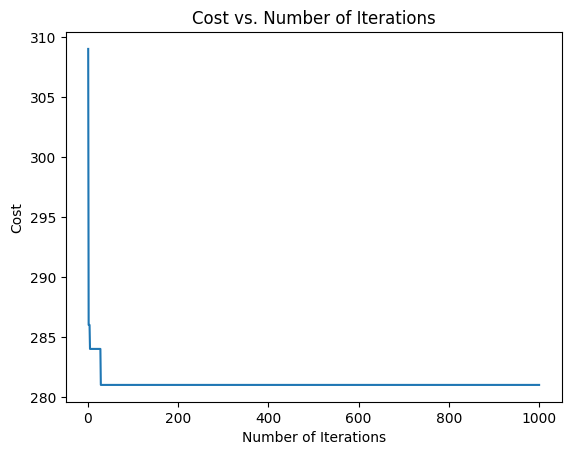

Best solution: [9, 5, 4, 10, 6, 7, 1, 8, 3, 11, 2]


In [10]:
import random
import math
import matplotlib.pyplot as plt

def simulated_annealing_tsp(initial_solution, maxiter, cost_matrix,t0):
    current_solution = initial_solution
    best_solution = current_solution
    T0 = t0  # Initial temperature
    Tk = T0
    costs = []  # List to store costs per iteration
    for k in range(maxiter):
        neighbor_solution = neighbour(current_solution)
        current_cost = cost_function(current_solution, cost_matrix)
        neighbor_cost = cost_function(neighbor_solution, cost_matrix)
        Tk = cooling_schedule(Tk)
        if neighbor_cost <= current_cost:
            current_solution = neighbor_solution
            if neighbor_cost < cost_function(best_solution, cost_matrix):
                best_solution = neighbor_solution
        else:
            acceptance_prob = accept_prob(current_cost, neighbor_cost, Tk)
            if random.random() < acceptance_prob:
                current_solution = neighbor_solution
        costs.append(current_cost)  # Append current cost to the list
    return best_solution, costs

# Example usage:
initial_solution = generate_initial_tour(11)
maxiter = 1000
cost_mat=df
temp=1
result, costs = simulated_annealing_tsp(initial_solution, maxiter, cost_mat,temp)

# Plot cost against number of iterations
plt.plot(range(1, maxiter + 1), costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations')
plt.show()

print("Best solution:", result)


Here we can see that as the number of iterations increasing the cost function readily decreasiong and become steadt after attaining a particular threshold for the iterations

**Part8**

Cost Vs iterations for temperature=1


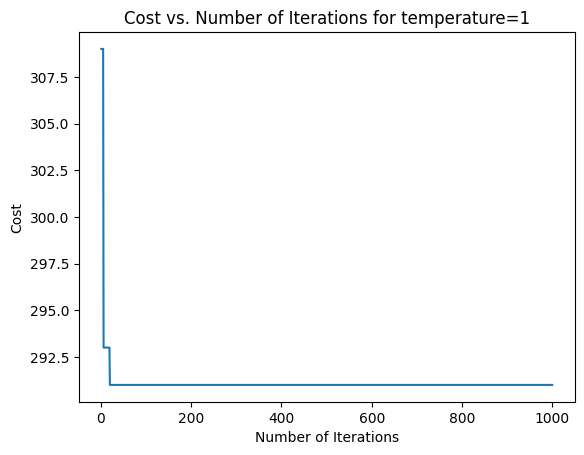

Best solution for temperature=1 is [9, 5, 4, 7, 6, 10, 1, 8, 3, 11, 2]
Cost Vs iterations for temperature=2


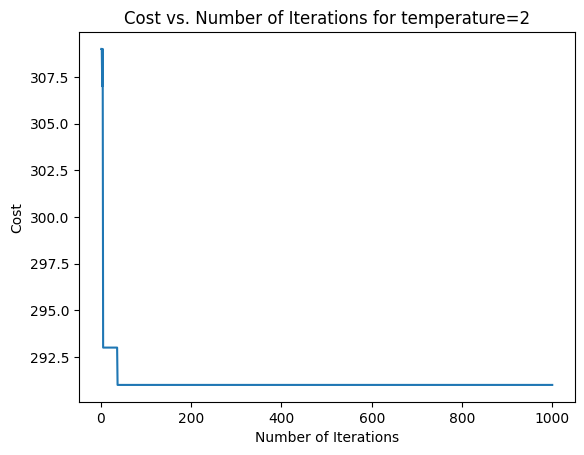

Best solution for temperature=2 is [9, 5, 4, 7, 6, 10, 1, 8, 3, 11, 2]
Cost Vs iterations for temperature=0.5


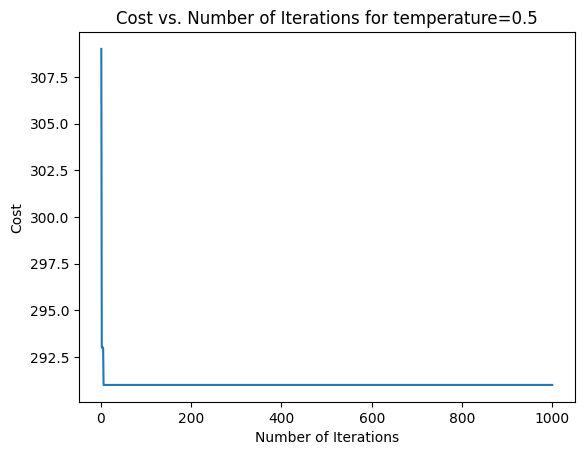

Best solution for temperature=0.5 is [9, 5, 4, 7, 6, 10, 1, 8, 3, 11, 2]
Cost Vs iterations for temperature=4


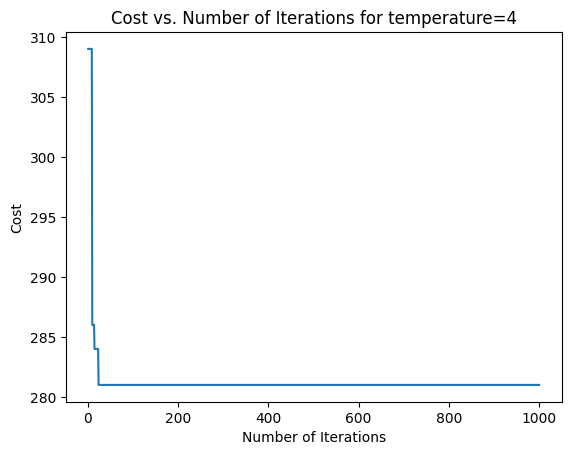

Best solution for temperature=4 is [9, 5, 4, 10, 6, 7, 1, 8, 3, 11, 2]
Cost Vs iterations for temperature=10


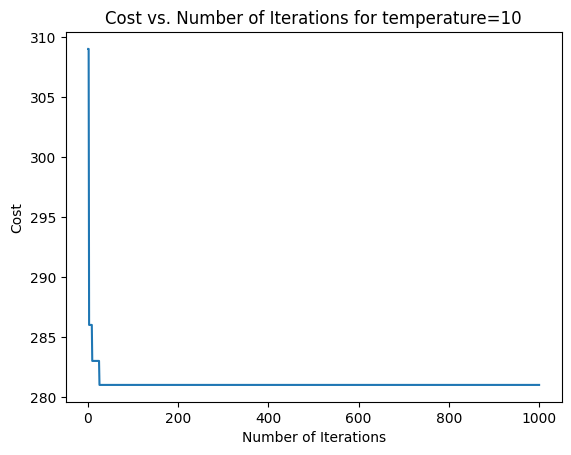

Best solution for temperature=10 is [9, 5, 4, 10, 6, 7, 1, 8, 3, 11, 2]
Cost Vs iterations for temperature=0.1


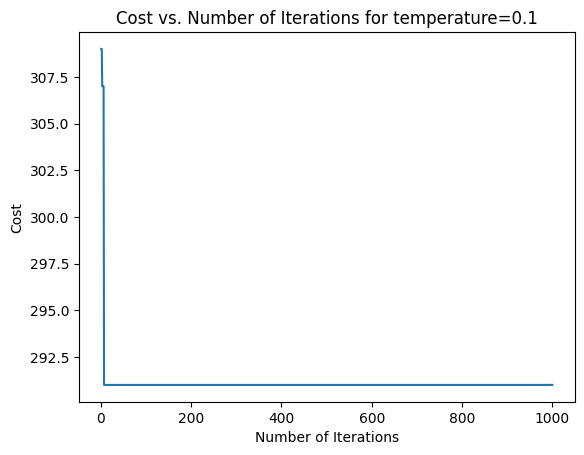

Best solution for temperature=0.1 is [9, 5, 4, 7, 6, 10, 1, 8, 3, 11, 2]


In [11]:
# Doing it for different values of t0
list_initial_temperatures=[1,2,0.5,4,10,0.1]
for t in list_initial_temperatures:
  res,cos=simulated_annealing_tsp(initial_solution, maxiter, cost_mat,t)
  print(f"Cost Vs iterations for temperature={t}")
  plt.plot(range(1, maxiter + 1), cos)
  plt.xlabel('Number of Iterations')
  plt.ylabel('Cost')
  plt.title(f'Cost vs. Number of Iterations for temperature={t}')
  plt.show()

  print(f"Best solution for temperature={t} is {res}")

Here we can observe that as we decreases the value of temperature the value of cost decreases steadly as compared to larger value of temperature means if we take a relatively smaller value of temperature then cost achieve its minimum just after few iterations then remains constant

**Part9**

In [14]:
#Doing the same for a different cooling schedule
def cooling_schedule_diff(Tk,k):
  return Tk/k
def simulated_annealing_tsp2(initial_solution, maxiter, cost_matrix,t0):
    current_solution = initial_solution
    best_solution = current_solution
    T0 = t0  # Initial temperature
    Tk = T0
    costs = []  # List to store costs per iteration
    for k in range(maxiter):
        neighbor_solution = neighbour(current_solution)
        current_cost = cost_function(current_solution, cost_matrix)
        neighbor_cost = cost_function(neighbor_solution, cost_matrix)
        Tk = cooling_schedule_diff(Tk,k+1)
        if neighbor_cost <= current_cost:
            current_solution = neighbor_solution
            if neighbor_cost < cost_function(best_solution, cost_matrix):
                best_solution = neighbor_solution
        else:
            acceptance_prob = accept_prob(current_cost, neighbor_cost, Tk)
            if random.random() < acceptance_prob:
                current_solution = neighbor_solution
        costs.append(current_cost)  # Append current cost to the list
    return best_solution, costs

<ipython-input-7-89797e6cb2e4>:7: RuntimeWarning: overflow encountered in divide
  return math.exp(-(neighbor_cost - current_cost) / Tk)
<ipython-input-7-89797e6cb2e4>:7: RuntimeWarning: divide by zero encountered in divide
  return math.exp(-(neighbor_cost - current_cost) / Tk)


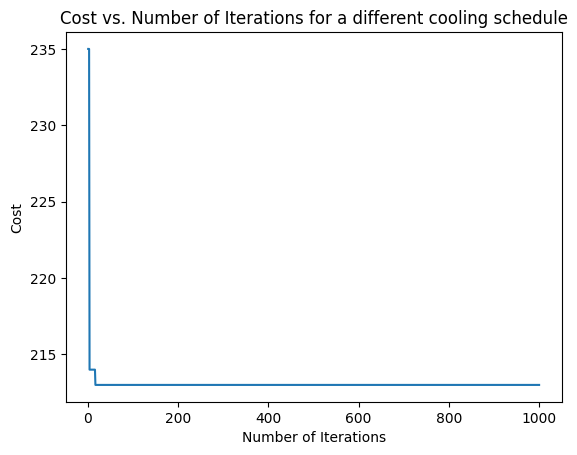

Best solution: [2, 4, 6, 10, 5, 8, 3, 11, 9, 1, 7]


In [15]:

# Example usage:
initial_solution = generate_initial_tour(11)
maxiter = 1000
cost_mat=df
temp=1
result1, costs1 = simulated_annealing_tsp2(initial_solution, maxiter, cost_mat,temp)

# Plot cost against number of iterations
plt.plot(range(1, maxiter + 1), costs1)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations for a different cooling schedule')
plt.show()

print("Best solution:", result1)

Here I have chosen Cooling schedule to be Tk/k at each iteration then we can see that the cost has sufficiently decreases to a greater extent as previously it was around 250 now it is below than 215

**Part10**

In [18]:
# Doing the same for 48 cities
df2=pd.read_csv('TSP48.csv',header=None)
df2.index=[i for i in range(1,49)]
df2.columns=[i for i in range(1,49)]

In [19]:
df2

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
1,0,4727,1205,6363,3657,3130,2414,563,463,5654,...,3530,825,2188,4820,3489,1947,6835,1542,2379,3744
2,4727,0,3588,2012,1842,6977,6501,5187,5028,2327,...,3085,4564,2756,1591,7027,6186,3472,5461,4390,2088
3,1205,3588,0,5163,2458,3678,3071,1742,1444,4462,...,2482,1027,1395,3617,3891,2686,5661,2023,1867,2560
4,6363,2012,5163,0,2799,8064,7727,6878,6581,1402,...,3669,6011,4638,1681,7987,7502,1877,6758,5360,2844
5,3657,1842,2458,2799,0,5330,4946,4200,3824,2012,...,1252,3227,2426,1169,5313,4706,3241,3962,2651,304
6,3130,6977,3678,8064,5330,0,743,3209,2670,6929,...,4435,2681,5053,6384,550,1224,7805,1670,2704,5230
7,2414,6501,3071,7727,4946,743,0,2468,1952,6673,...,4185,2049,4415,6051,1219,482,7635,1054,2432,4884
8,563,5187,1742,6878,4200,3209,2468,0,718,6203,...,4091,1319,2544,5358,3632,1987,7391,1785,2879,4296
9,463,5028,1444,6581,3824,2670,1952,718,0,5789,...,3543,676,2590,4993,3039,1486,6934,1112,2196,3876
10,5654,2327,4462,1402,2012,6929,6673,6203,5789,0,...,2497,5160,4318,937,6795,6507,1268,5773,4249,1914


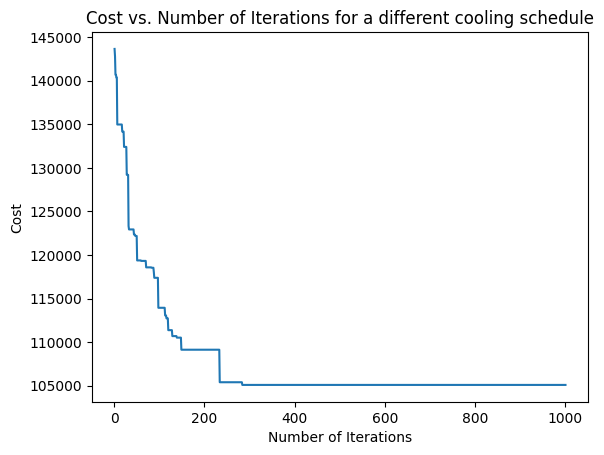

Best solution: [6, 7, 8, 34, 14, 24, 35, 2, 31, 20, 32, 13, 46, 28, 47, 39, 26, 16, 9, 19, 43, 30, 21, 41, 4, 48, 3, 1, 40, 44, 12, 11, 45, 10, 5, 15, 38, 37, 17, 25, 33, 36, 27, 18, 22, 23, 29, 42]


In [20]:
#Implementing the algorithm
num_cities=len(df2)
initial_sol=generate_initial_tour(num_cities)

maxiter = 1000
cost_mat1=df2
temp=1
result2, costs2 = simulated_annealing_tsp(initial_sol, maxiter, cost_mat1,temp)

# Plot cost against number of iterations
plt.plot(range(1, maxiter + 1), costs2)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations for a different cooling schedule')
plt.show()

print("Best solution:", result2)

Here in case of 48 cities te cost function reduces gradually upto 400 iterations and it become steady after that

Cost Vs iterations for temperature=1


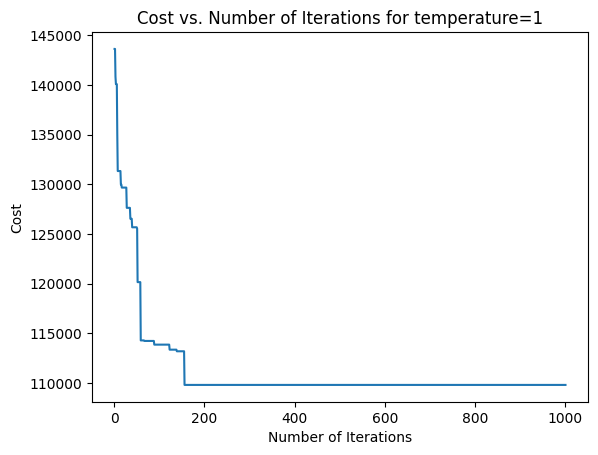

Best solution for temperature=1 is [6, 7, 8, 34, 14, 24, 35, 2, 31, 13, 32, 20, 28, 46, 16, 47, 39, 26, 9, 19, 43, 30, 21, 4, 48, 12, 1, 41, 3, 40, 44, 11, 45, 10, 5, 15, 17, 37, 38, 25, 33, 36, 27, 18, 22, 23, 29, 42]
Cost Vs iterations for temperature=2


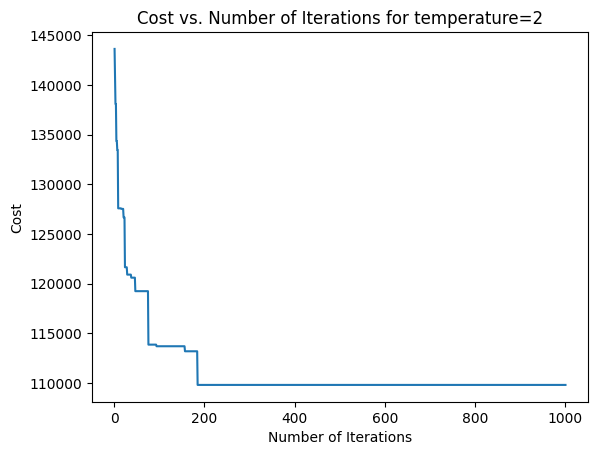

Best solution for temperature=2 is [6, 7, 8, 34, 14, 24, 35, 2, 31, 13, 32, 20, 28, 46, 16, 47, 39, 26, 9, 19, 43, 30, 21, 4, 48, 12, 1, 41, 3, 40, 44, 11, 45, 10, 5, 15, 17, 37, 38, 25, 33, 36, 27, 18, 22, 23, 29, 42]
Cost Vs iterations for temperature=0.5


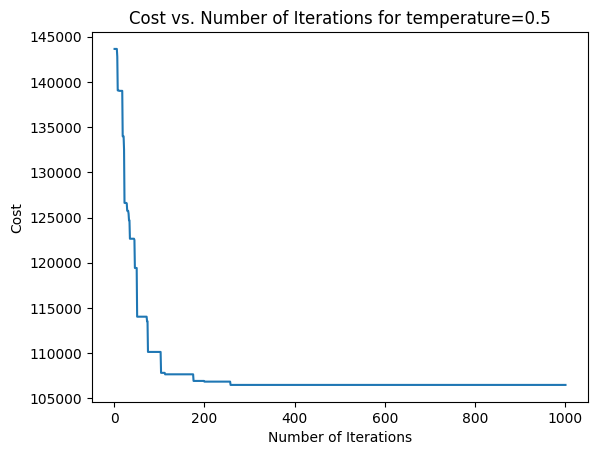

Best solution for temperature=0.5 is [6, 7, 8, 34, 14, 24, 35, 2, 13, 31, 28, 20, 32, 39, 47, 46, 26, 16, 9, 19, 43, 30, 21, 4, 48, 12, 1, 41, 3, 40, 44, 11, 45, 10, 5, 15, 17, 37, 38, 25, 33, 36, 27, 18, 22, 23, 29, 42]
Cost Vs iterations for temperature=4


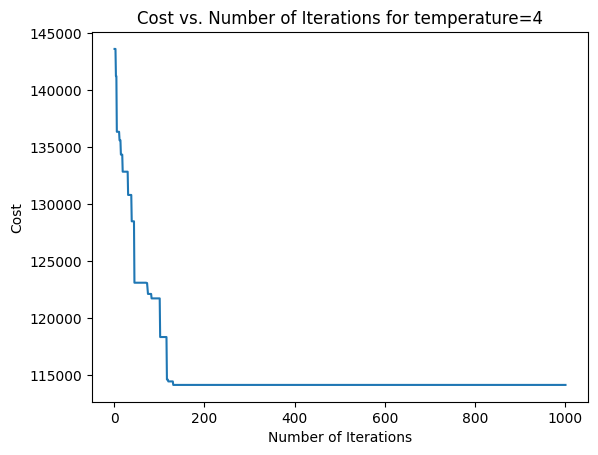

Best solution for temperature=4 is [6, 7, 8, 34, 14, 24, 35, 2, 13, 31, 28, 20, 32, 47, 46, 39, 26, 16, 9, 19, 30, 4, 21, 43, 12, 1, 41, 48, 3, 40, 44, 11, 45, 10, 5, 15, 17, 37, 38, 25, 33, 36, 27, 18, 22, 23, 29, 42]
Cost Vs iterations for temperature=10


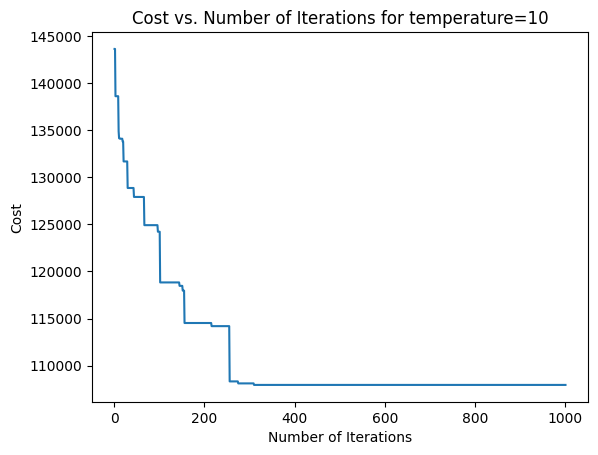

Best solution for temperature=10 is [6, 7, 8, 34, 14, 24, 35, 2, 31, 20, 32, 13, 47, 28, 46, 16, 26, 39, 9, 30, 19, 43, 21, 4, 48, 12, 1, 41, 3, 40, 44, 11, 45, 10, 5, 15, 38, 37, 17, 25, 33, 36, 27, 18, 22, 23, 29, 42]
Cost Vs iterations for temperature=0.1


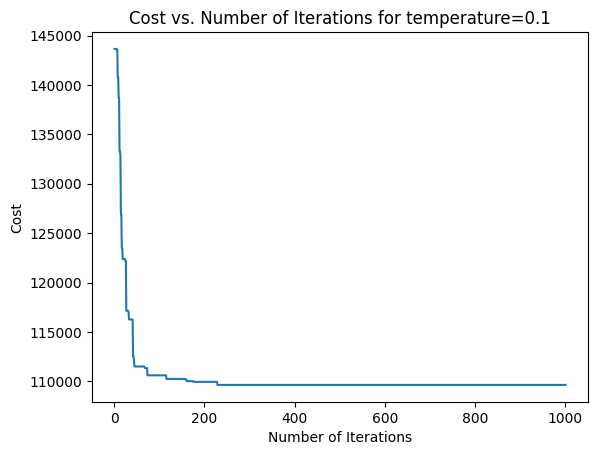

Best solution for temperature=0.1 is [6, 7, 8, 34, 14, 24, 35, 2, 31, 20, 32, 13, 46, 28, 47, 16, 26, 39, 9, 30, 19, 43, 21, 4, 48, 12, 1, 41, 3, 40, 44, 11, 45, 10, 5, 15, 38, 37, 17, 25, 33, 36, 27, 18, 22, 23, 29, 42]


In [21]:
# Doing it for different values of t0
list_initial_temperatures=[1,2,0.5,4,10,0.1]
for t in list_initial_temperatures:
  res1,cos1=simulated_annealing_tsp(initial_sol, maxiter, cost_mat1,t)
  print(f"Cost Vs iterations for temperature={t}")
  plt.plot(range(1, maxiter + 1), cos1)
  plt.xlabel('Number of Iterations')
  plt.ylabel('Cost')
  plt.title(f'Cost vs. Number of Iterations for temperature={t}')
  plt.show()

  print(f"Best solution for temperature={t} is {res1}")

Here also for smaller value of temperature the cost value attains minimum at a faster pace as compared to larger value of temperatures means number of iterations required to attains a feasible route for smaller value of temperature are less as compared to larger value of temperatures

<ipython-input-7-89797e6cb2e4>:7: RuntimeWarning: overflow encountered in divide
  return math.exp(-(neighbor_cost - current_cost) / Tk)
<ipython-input-7-89797e6cb2e4>:7: RuntimeWarning: divide by zero encountered in divide
  return math.exp(-(neighbor_cost - current_cost) / Tk)


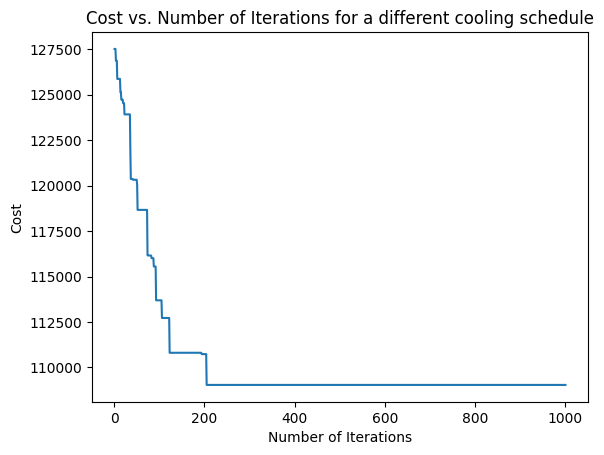

Best solution: [10, 39, 44, 37, 27, 17, 47, 48, 33, 7, 18, 40, 15, 46, 43, 36, 1, 22, 30, 14, 5, 2, 4, 42, 11, 16, 26, 35, 24, 25, 23, 12, 28, 8, 29, 21, 31, 38, 3, 34, 45, 19, 9, 41, 13, 20, 6, 32]


In [22]:
# Doing it now for different cooling schedule
# Example usage:
initial_sol = generate_initial_tour(48)
maxiter = 1000
cost_mat1=df2
temp=1
result2, costs2 = simulated_annealing_tsp2(initial_sol, maxiter, cost_mat1,temp)

# Plot cost against number of iterations
plt.plot(range(1, maxiter + 1), costs2)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations for a different cooling schedule')
plt.show()

print("Best solution:", result2)